In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy

In [2]:
# generating the random latitude and longitude arrays
# storing them in variables
# packing the latitude and longitude values as pairs using the zip function

lats = np.random.uniform(-90.000, 90.000, size=1500)

lngs = np.random.uniform(-180.000, 180.000, size=1500)

lats_lngs = zip(lats, lngs)

lats_lngs

# The output of this cell will be a zip object in memory

# Notes on above code block

- The zip function packs each pair of lats and lngs with the same index into a tuple
    - Here, that produces 1500 tuples of paired latitudes and longitues 
        - each latitude and longitude in a tuple can be accessed by the index of 0 and 1 respectively
    - cf the jupyter notebook API_Practice.ipynb for practice packing and unpacking zipped tuples

In [3]:
# adding the latitude and longitudes to a list
# means we only need to create the random sets once
# NOTE you can only unzup a zipped tuple once before it's removed from computer's memory.

coordinates = list(lats_lngs)

In [4]:
# creating an empty list to hold the cities

cities = []

# identifying nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city name is unique, add to the cities []
    # The for-loop could find duplicate cities, and we only want unique cities
    
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count:
# Note that citipy finds the nearest city to the latitude and longitude pair with a population of 500+

print(len(cities))

print(cities[3])

590
jalu


# Getting Started with OpenWeather API

## JavaScript Object Notation Format for API Data

- Retrieving data from a website requires a requset which returns data in a text format (not tsv or csv)
- JavaScript Object Notation (JSON)
    - data within this sort of object opens and closes with curly braces {}, like a Python Dictionary
    - inside the JSON object, is a collection of dictionaries and arrays.

- To request JSON data over the internet, need the Requests Library in Python 
    - Anaconda comes witih version 2.22 or later installed.
    
[Doc for Requests Library](https://requests.kennethreitz.org/en/master/)]

[Quickstart Doc](https://requests.kennethreitz.org/en/master/user/quickstart/#make-a-request)

# Get the City Weather Data

## Pseudocoding 

1. Import the dependencies and initialize counters and an empty list that will hold weather data
2. Loop through the cities list
3. Group the cities in sets of 50 to log the process as we find weather data for each city
    - two counters will be need: one to log the city count from 1-50 and the other for the sets
4. Build the city_url or endpoint for each city
5. log the URL and the record and set numbers
6. Make an API request for each city
7. Parse the JSON weather data for the following: 
    - City, country, and date
    - Lat and long
    - Max temp
    - Humidity
    - Cloudiness 
    - Wind speed
8. Add the data to a list in a deictionary format and then convert to a DataFrame

In [5]:
# here, declare empty list city_data = []
# add print statement that ref the beginning of the logging 
# create counters for the record numbers 1-50
# set the counter

import requests

from config import weather_api_key

import time
from datetime import datetime

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

#city_weather = url + "&q=" + "ushuaia"

#print(city_weather)

In [6]:
# creating the empty list to hold weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval    ")
print("----------------------------")

# create the counters

record_count = 1

set_count = 1

# here setting the counters at 1 because we want the first iteration of logging for each recorded response to st @ 1

# Now iterating through list of cities and building the URL for reach city, grouping in sets of 50
# use for i in range(len(cities)) and index to notify when reach 50
# at 50, pause for 60 sec using time.sleep(60) free OpenWeatherMap API allows for 60calls/min
# the pause prevents time-out errors
# retrieve city from cities list and add to the city_url using indexing:

# here using the enumerate method because it will return the city name - vital for ural
# the in range() would have returned an index. 
# enumerate doc: https://docs.python.org/3/library/functions.html#enumerate

for i, city in enumerate(cities):
# you have the 2 variables here because of the way enumerate ret. tuple w/ count and value    
    # Group cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
    # Create endpoint URL with each city
    
    
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record and set numbers and the city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add one to the record_count
    
    record_count += 1
    
    # Run API request for each of the cities using a try except
    
    try: 
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # Parse the needed data
        
        city_lat = city_weather['coord']['lat']
        
        city_lng = city_weather['coord']['lon']
        
        city_max_temp = city_weather['main']['temp_max']
        
        city_humidity = city_weather['main']['humidity']
        
        city_clouds = city_weather['clouds']['all']
        
        city_wind = city_weather['wind']['speed']
        
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append city information to the city_data list
        
        city_data.append({"City": city.title(),
                         "Lat": city_lat, 
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds, 
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # if error is experienced, skip the city:
    
    except:
        
        print("City not found. Skipping...")
        
        # pass is a general purpose statement to handle all errors encountered and let prog. continue
        # in reality, pass statement is not best practice
        # better practice is to handle each error as it comes (add another try block or print error)
        pass
    
# Indicate that Data Loading is complete:

print('-------------------------------')

print('Data Retrieval Complete')

print('-------------------------------')
    
    

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | jalu
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | isangel
Processing Record 8 of Set 1 | pochutla
Processing Record 9 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | marrakesh
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | thap khlo
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | grand forks
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | barrow
Processing Rec

Processing Record 38 of Set 4 | rundu
Processing Record 39 of Set 4 | napier
Processing Record 40 of Set 4 | nizhniy kuranakh
Processing Record 41 of Set 4 | viedma
Processing Record 42 of Set 4 | srandakan
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | sisimiut
Processing Record 45 of Set 4 | manzil salim
Processing Record 46 of Set 4 | harper
Processing Record 47 of Set 4 | nagato
Processing Record 48 of Set 4 | poopo
Processing Record 49 of Set 4 | kavaratti
Processing Record 50 of Set 4 | bandarbeyla
Processing Record 1 of Set 5 | fairbanks
Processing Record 2 of Set 5 | eureka
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | huarmey
Processing Record 6 of Set 5 | port augusta
Processing Record 7 of Set 5 | madimba
Processing Record 8 of Set 5 | jalesar
Processing Record 9 of Set 5 | mogadishu
Processing Record 10 of Set 5 | ji-parana
City not found. Skipping...
Processing Record 11 of Set

Processing Record 19 of Set 8 | pisco
Processing Record 20 of Set 8 | ahipara
Processing Record 21 of Set 8 | nome
Processing Record 22 of Set 8 | talawdi
City not found. Skipping...
Processing Record 23 of Set 8 | vao
Processing Record 24 of Set 8 | sambava
Processing Record 25 of Set 8 | tuatapere
Processing Record 26 of Set 8 | ajdabiya
Processing Record 27 of Set 8 | vigrestad
Processing Record 28 of Set 8 | monrovia
Processing Record 29 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 8 | yerbogachen
Processing Record 31 of Set 8 | waksma
City not found. Skipping...
Processing Record 32 of Set 8 | russell
Processing Record 33 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 34 of Set 8 | yanam
Processing Record 35 of Set 8 | calvia
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | raudeberg
Processing Record 38 of Set 8 | baykit
Processing Record 39 of Set 8 | saint-francois
Processing Record 40 of Set 8 | lug

Processing Record 6 of Set 12 | san policarpo
Processing Record 7 of Set 12 | tombouctou
Processing Record 8 of Set 12 | samusu
City not found. Skipping...
Processing Record 9 of Set 12 | sunndalsora
Processing Record 10 of Set 12 | gumushane
City not found. Skipping...
Processing Record 11 of Set 12 | rezekne
Processing Record 12 of Set 12 | rudnogorsk
Processing Record 13 of Set 12 | taber
Processing Record 14 of Set 12 | gravdal
Processing Record 15 of Set 12 | gibsons
Processing Record 16 of Set 12 | gamba
Processing Record 17 of Set 12 | tukrah
Processing Record 18 of Set 12 | saquarema
Processing Record 19 of Set 12 | yar-sale
Processing Record 20 of Set 12 | oschatz
Processing Record 21 of Set 12 | antalaha
Processing Record 22 of Set 12 | sistranda
Processing Record 23 of Set 12 | morant bay
Processing Record 24 of Set 12 | kisante
Processing Record 25 of Set 12 | loa janan
Processing Record 26 of Set 12 | rosarito
Processing Record 27 of Set 12 | cagayan de tawi-tawi
City not 

In [7]:
#print(city_url)

In [8]:
# city_weather = requests.get(city_url).json()
# print(city_weather)

# Try and Except block

- help you try a block of code, if it throws an error, it goes to the except block
- The try block is the code you would want to run. 
    - set up is like a conditional statement - indention 
    - you can tell the except block the exact error 
    - good idea to write a print statement to communicate you've received an error
    - then add a continue so that it goes back to the loop.
    
[Doc for try-except](https://docs.python.org/3.7/tutorial/errors.html)

In [9]:
# converting the city_data list created from API request above to pandas DF

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,75.60,93,100,8.03,JP,2022-07-15 11:08:01
1,Avarua,-21.2078,-159.7750,73.45,68,100,8.05,CK,2022-07-15 11:08:02
2,Hobart,-42.8794,147.3294,46.26,83,40,8.05,AU,2022-07-15 11:08:02
3,Jalu,29.0331,21.5482,89.64,23,0,8.99,LY,2022-07-15 11:08:03
4,Chokurdakh,70.6333,147.9167,63.95,59,100,3.06,RU,2022-07-15 11:08:03
5,Punta Arenas,-53.1500,-70.9167,30.22,100,20,8.05,CL,2022-07-15 11:08:04
6,Isangel,-19.5500,169.2667,71.67,80,99,13.71,VU,2022-07-15 11:08:04
7,Pochutla,15.7432,-96.4661,75.81,73,100,4.16,MX,2022-07-15 11:08:04
8,Georgetown,5.4112,100.3354,89.53,66,20,5.75,MY,2022-07-15 11:05:08
9,Marrakesh,31.6315,-8.0083,93.27,40,20,3.44,MA,2022-07-15 11:08:05


In [10]:
# changing the order of the columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed

new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_ordered = city_data_df[new_col_order]

city_data_ordered.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-07-15 11:08:01,35.7333,140.8333,75.60,93,100,8.03
1,Avarua,CK,2022-07-15 11:08:02,-21.2078,-159.7750,73.45,68,100,8.05
2,Hobart,AU,2022-07-15 11:08:02,-42.8794,147.3294,46.26,83,40,8.05
3,Jalu,LY,2022-07-15 11:08:03,29.0331,21.5482,89.64,23,0,8.99
4,Chokurdakh,RU,2022-07-15 11:08:03,70.6333,147.9167,63.95,59,100,3.06
5,Punta Arenas,CL,2022-07-15 11:08:04,-53.1500,-70.9167,30.22,100,20,8.05
6,Isangel,VU,2022-07-15 11:08:04,-19.5500,169.2667,71.67,80,99,13.71
7,Pochutla,MX,2022-07-15 11:08:04,15.7432,-96.4661,75.81,73,100,4.16
8,Georgetown,MY,2022-07-15 11:05:08,5.4112,100.3354,89.53,66,20,5.75
9,Marrakesh,MA,2022-07-15 11:08:05,31.6315,-8.0083,93.27,40,20,3.44


In [11]:
# Creating an output file to save DataFrame to a CSV file in a new folder

output_data_file = "weather_data/cities.csv"

# Export the city_data_ordered into a csv

city_data_ordered.to_csv(output_data_file, index_label="City_ID")

# Creating Scatter Plots from Weather Data

- First extract data from the city_data_ordered dataframe
    - lat
    - max_temps
    - humidity
    - cloudiness
    - wind_speed
    
- Also need to use the time module to get today's date
    - you can get the date and convert it to a readable format using this code:
        - time.strftime(%x)
        - [time module documentation](https://docs.python.org/3/library/time.html)
        
- Then use matplotlib to make the scatter plot and format it
    - recall that you need plt.scatter(x-axis, y-axis, params) to make the scatter plot
    - then use plt.title, plt.label, etc for other features

- Then save the figure to weather_data file

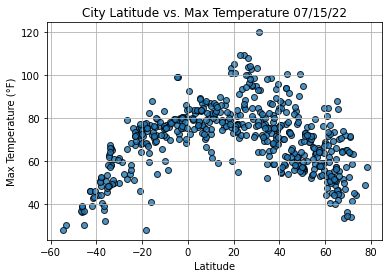

In [15]:
# import the time module

import time

# Extract the data from the city_data_ordered dataframe

lats = city_data_ordered["Lat"]

max_temps = city_data_ordered["Max Temp"]

humidity = city_data_ordered["Humidity"]

cloudiness = city_data_ordered["Cloudiness"]

wind_speed = city_data_ordered["Wind Speed"]

# build the scatter plot

plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (°F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show the plot

plt.show()

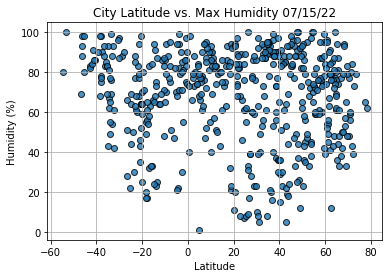

In [16]:
# Now plotting latitude vs humidity
# Can simply refactor the code from the latitude vs. max temp

plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Other graph properties

plt.title(f"City Latitude vs. Max Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show the plot

plt.show()

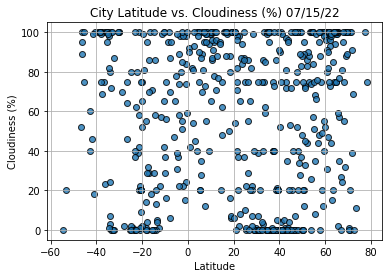

In [17]:
# Now plotting latitude vs. cloudiness
# reuse and refactor code:

plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show the plot

plt.show()

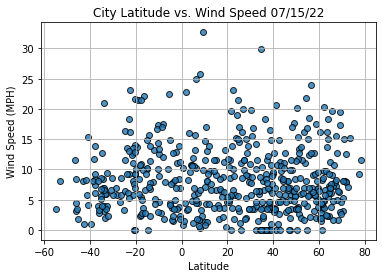

In [18]:
# latitude vs. wind speed

plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (MPH)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show the plot

plt.show()

# Linear Regression to Find Variable Relationship

- **Linear Regression:** a formula used to find the relationship between a dependent variable and one or more independent variables
    - **Dependent Variable:** The variable tested by the analyst to observe how it is affected by the independent variable
    - **Independent Variable:** The variable changed by the analyst to observe how it is affected by the indpendent variable
    
- To determine the relationship between the dependent and independent variables, we can plot the linear regression line using the line equation:
    - y = mx + b
        - m = slope
        - b = y-intercept
    - for every x value, you get a predicted y value
    
- To determine the strength of the relationship between the line and the plotted data, find the **correlation coefficient, or r-value**
    - r-value close to 1 shows a strong positive correlation
    - r-value close to -1 shows a strong negative correlation
    - r-value close to 0 shows no correlation
        
- Note that the **standard error** is tells if the line represents the data. 
    - The lower the standard error, the least likely it is to represent the data.
    
- the **p-value** is used to determine the significance of the results
    - most data scientists like to us a significance level of 0.05 which means the following:
        - a linear regression with p-value > 0.05 is not statistically significant
        - a linear regression with a p-value < 0.05 is statistically significant
        - **P-values can be used to justify rejecting a null hypothesis**
        
[Documentation for the linear regression function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress)
    

# Finding Correlation between Lat and Max Temp

- Have an algorithm that performs the linear regression, returns the equation for the regression line, and correlation coefficient, and p value, and adds teh regression line to a scatter plot of the city weather data:

`# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)`

`# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept`

`# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))`

`# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)`
`# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
`# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

- Can reuse the above code with changes for each weather parameter. Variables for each graph:
    - x values, the latitudes
    - y values, the four weather parameters
    - y label, the weather parameter being plotted
    - x- and y-values given as a tuple, (10,40), for the regression line equation to be placed as a scatter plot

- An efficient way to do this is to convert the above code to a function
    - call the function and pass values to those variables

In [26]:
# import linear regression dependency

from scipy.stats import linregress

# Creating the linear regression function 
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the line equation
    
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
    
    # create a scatter plot and plot regression line
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, "r")
    
    # Annotate text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel("Latitude")
    
    plt.ylabel(y_label)
    
    plt.show()

In [27]:
# to perform regression analysis on max temps in N and S hemispheres, need a N Data)frames from city_data_ordered
# can use the loc method on the current DataFrame 
# to get specific row from a DataFrame = row = df.loc[row_index]

index13 = city_data_ordered.loc[13]
index13

City                 Quatre Cocos
Country                        MU
Date          2022-07-15 11:08:07
Lat                      -20.2078
Lng                       57.7625
Max Temp                    75.31
Humidity                       70
Cloudiness                     65
Wind Speed                  13.96
Name: 13, dtype: object

In [28]:
# you can also filter a dataframe based on a value of a row
# to get all N. Hemisphere latitudes (lat > 0)
# filter the DataFrame using city_data_ordered["Lat"] >= 0
# returns a Boolean for all the rows that meet that criteria
# to get the data the meet that criteria, use the loc method with the conditionalfilter inside the brackets


city_data_ordered.loc[(city_data_ordered["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-07-15 11:08:01,35.7333,140.8333,75.60,93,100,8.03
3,Jalu,LY,2022-07-15 11:08:03,29.0331,21.5482,89.64,23,0,8.99
4,Chokurdakh,RU,2022-07-15 11:08:03,70.6333,147.9167,63.95,59,100,3.06
7,Pochutla,MX,2022-07-15 11:08:04,15.7432,-96.4661,75.81,73,100,4.16
8,Georgetown,MY,2022-07-15 11:05:08,5.4112,100.3354,89.53,66,20,5.75


In [29]:
# you can then assign this filtered DataFrame to a variable and run the regression function
# use the same method but <= 0 for the Southern Hemisphere

northern_hemi_df = city_data_ordered.loc[(city_data_ordered["Lat"] >= 0)]

southern_hemi_df = city_data_ordered.loc[(city_data_ordered["Lat"] <= 0)]

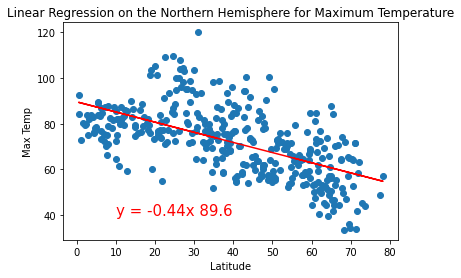

In [30]:
# performing the linear regression function on the max temp for the Northern Hemisphere
# first need to extract the x and y values we want from the northern_hemi_df
# call the plot_linear_regression function with the x and y values and edit the other args. 

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,40))

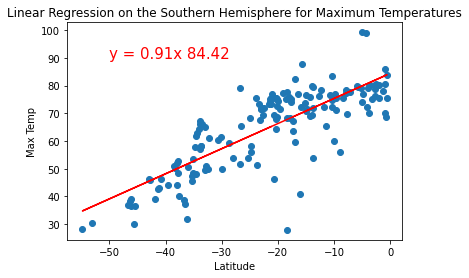

In [31]:
# Doing the same for the S. Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temperatures",
                      "Max Temp", (-50, 90))

In [32]:
linregress(x_values, y_values)

LinregressResult(slope=0.9062618610018454, intercept=84.41858638263815, rvalue=0.8072976438309933, pvalue=1.4645171158859933e-37, stderr=0.05304153367793781, intercept_stderr=1.3355704347099437)

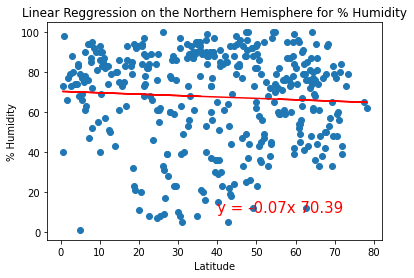

In [38]:
# Performing the linear regression for latitude and humidity

# northern hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                      "Linear Reggression on the Northern Hemisphere for % Humidity", "% Humidity", (40,10))

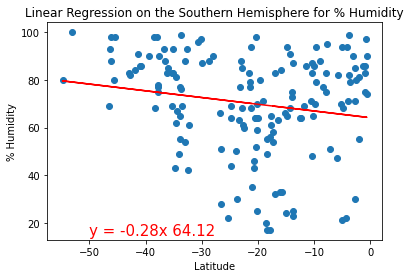

In [39]:
# Performing the linear regression for latitude and humidity

# Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity", (-50,15))

In [40]:
# if the r-value is less than 0.04, then the % humidity is unpredictable
# due to changing weather patterns that can increase or decrease percent humidity

linregress(x_values, y_values)

LinregressResult(slope=-0.2822234525933629, intercept=64.11923608633758, rvalue=-0.17758798809587698, pvalue=0.025595407597840965, stderr=0.12521565227239528, intercept_stderr=3.1528938087152607)

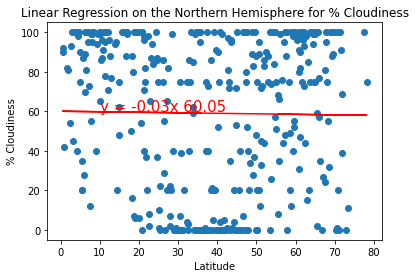

In [45]:
# northern hemisphere latitude and % cloudiness

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere for % Cloudiness", 
                      "% Cloudiness", (10,60))


In [46]:
linregress(x_values, y_values)

LinregressResult(slope=-0.026359645558633932, intercept=60.04866191692138, rvalue=-0.013753194761578604, pvalue=0.792037821575582, stderr=0.0999012647475095, intercept_stderr=4.408039497406119)

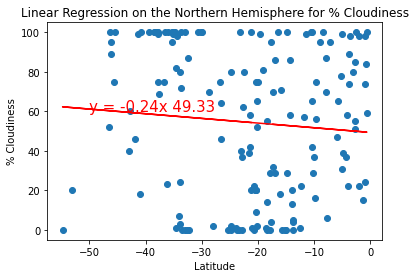

In [47]:
# southern hemisphere latitude and % cloudiness

x_values = southern_hemi_df['Lat']

y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for % Cloudiness", 
                      "% Cloudiness", (-50, 60))

In [48]:
linregress(x_values, y_values)

LinregressResult(slope=-0.23618993652012252, intercept=49.32887309105679, rvalue=-0.08303715880492055, pvalue=0.29961206974660826, stderr=0.22694684856344458, intercept_stderr=5.714455826868461)

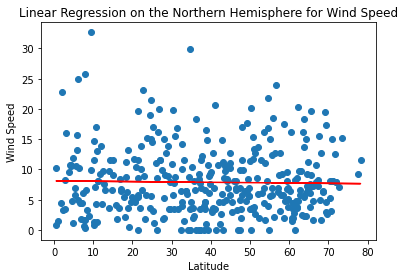

In [51]:
# northern hemisphere latitude vs. wind speed

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Northern Hemisphere for Wind Speed",
                      "Wind Speed", (40,35))

In [52]:
linregress(x_values, y_values)

LinregressResult(slope=-0.005800107368179896, intercept=8.105392965071992, rvalue=-0.021040548250937, pvalue=0.686655273500937, stderr=0.014366762696108369, intercept_stderr=0.6339184751500884)

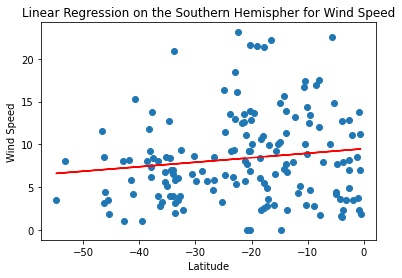

In [53]:
# southern hemisphere latitude vs. wind speed

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                      "Linear Regression on the Southern Hemispher for Wind Speed", 
                      "Wind Speed", (-50,35))

In [54]:
linregress(x_values, y_values)

LinregressResult(slope=0.05265285724945833, intercept=9.491595816677906, rvalue=0.13517587848591026, pvalue=0.09037473924488115, stderr=0.030899817750111698, intercept_stderr=0.7780484492691087)